In [ ]:
using Plots
using LaTeXStrings

# Lucas Schmidt Ferreira de Araujo

# Problem 01

We have

$$ f^{\delta}(x) = f(x) + n^{\delta}(x) $$

$$ n^{\delta}(x) = \sqrt{2} \delta sin(2 \pi k x) $$

Such that

$$ f^{\delta}(0) = f^{\delta}(1) = 0 $$

$$ f(0) = f(1) = 0$$

.1

One has

$$ || f - f^{\delta} ||_{L^2} = || n^{\delta}(x) ||_{L^2} = \sqrt{2} \delta \left( \int_{0}^{1} sin^2(2 \pi k x) \right)^{1/2} = \delta $$

$$ || f - f^{\delta} ||_{L^{\infty}} = \sqrt{2} \delta $$



Also

$$ || f' - f'^{\delta} ||_{L^2} = || n'^{\delta}(x) ||_{L^2} = \sqrt{2} \delta 2 \pi k \left( \int_{0}^{1} cos^2(2 \pi k x) \right)^{1/2} = 2 \pi k \delta $$

$$ || f' - f'^{\delta} ||_{L^{\infty}} = \sqrt{2} \delta 2 \pi k$$

$$ \frac{|| f' - f'^{\delta} ||_{L^2}}{|| f - f^{\delta} ||_{L^2}} = \frac{|| f' - f'^{\delta} ||_{L^\infty}}{|| f - f^{\delta} ||_{L^\infty}} = 2\pi k \rightarrow \infty, \quad k \rightarrow \infty  $$

In [2]:
function n(δ , x)
    return √2 * δ * sin( 2 * π * k * x)
end

function f(x)
    return sin(2 * π * x)
end

function fδ(x,δ)
    return f(x) + n(δ,x)
end

function dfdx(x)
    return 2 * π * cos(2 * π * x)
end

function dfδdx(x , δ)
    return dfdx(x) + 2 * π * k * √2 * δ * cos( 2*π*k*x )
end

function Euler_Central(x , δ , h )
    return (fδ(x + h, δ) - fδ(x-h , δ)) / (2*h)
end

Euler_Central (generic function with 1 method)

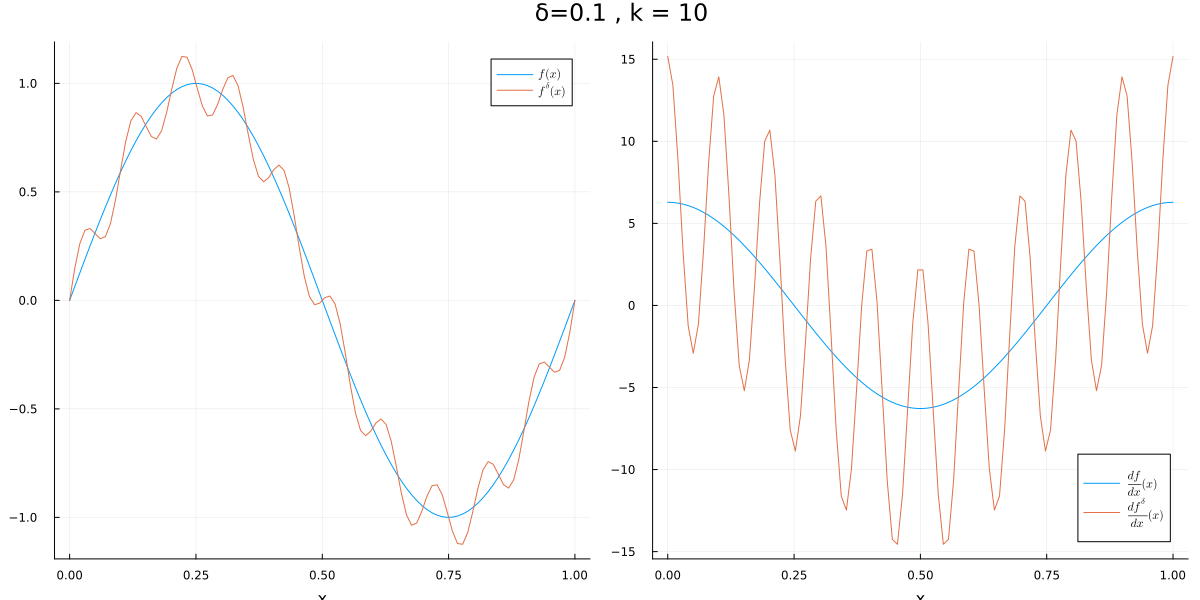

In [3]:
k = 10
δ = 1/k

x = range(0,1,100)

p1 = plot( x , f.(x) , label = L"f(x)")
plot!( x , fδ.(x , δ) , label = L"f^{δ}(x)" )

p2 = plot( x , dfdx.(x) , label = L"\frac{df}{dx}(x)")
plot!(x , dfδdx.(x,δ) , label = L"\frac{df^{δ}}{dx}(x)" )

plot(p1 , p2 , size = (1200,600) , suptitle = "δ=$(δ) , k = $(k)" , xlabel = "x")

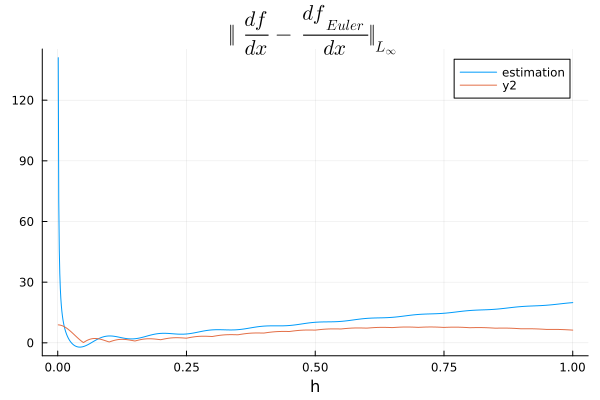

In [6]:
h = range(0 , 1 , 1000)

dfδEuler = Euler_Central.(x , Ref(δ) , .001)

diff = [ abs( dfdx(x_) - Euler_Central(x_,δ,h_) )  for x_ in x , h_ in h  ]
L∞ = maximum(diff , dims = 1)[1,:]

function estimation(h)
    A = 2*h*π^2
    B = √2 * δ * cos(2*π*k*h) / h
    return A + B
end
plot( h , estimation.(h) , label = "estimation")
plot!( h , L∞ , xlabel = "h" , title = L"\Vert \frac{df}{dx} -\frac{df_{Euler}}{dx}\Vert_{L_{∞} }")

# Problem 05

We want to solve

$$ y(x) - \alpha \frac{d^2 y}{dx^2}(x) = g(x) $$
$$ y(0) = y(1) = 0 $$

We make 

$$ y''(x) \approx \frac{1}{h^2} (y_{i-1} - 2 y_i + y_{i+1}) $$
$$ y_i - \gamma (y_{i-1} - 2 y_i + y_{i+1})  = -\gamma y_{i-1} + (1+2\gamma)y_i - \gamma y_{i+1} = g_i ,\quad \gamma = \frac{\alpha}{h^2}$$

Putting in matrix form, one has that

$$ 
\begin{bmatrix}
1 + 2\gamma & -\gamma & 0 & \cdots & 0 \\
-\gamma & 1 + 2\gamma & -\gamma & \cdots & 0 \\
0 & -\gamma & 1 + 2\gamma & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -\gamma \\
0 & 0 & 0 & -\gamma & 1 + 2\gamma
\end{bmatrix}
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_N
\end{bmatrix}
=
\begin{bmatrix}
g_1 \\
g_2 \\
g_3 \\
\vdots \\
g_N
\end{bmatrix}
$$

$$ Ay = g \implies y = A^{-1} g $$

In [5]:
function fα(α,δ , NX = 1000)
    h = (1-0)/NX
    x = [h*q for q = 1:NX]
    A = zeros( NX , NX )
    γ = α / h^2
    A[1,1] = 1 + 2 * γ
    A[1,2] = - γ
    
    A[end , end-1] = -γ
    A[end,end] = 1 + 2*γ
    for q = 2:NX-1
        A[q,q-1] = -γ
        A[q,q] = 1 + 2*γ
        A[q,q+1] = -γ
    end
    g = fδ.(x,δ)
    y = inv(A) * g;
    return x , y
end 

fα (generic function with 2 methods)

In [6]:
α = .001
δ = .1
k = 10

x , y = fα(α,δ)
dydx = (y[2:end] .- y[1:end-1]) / (x[2] - x[1]) ;

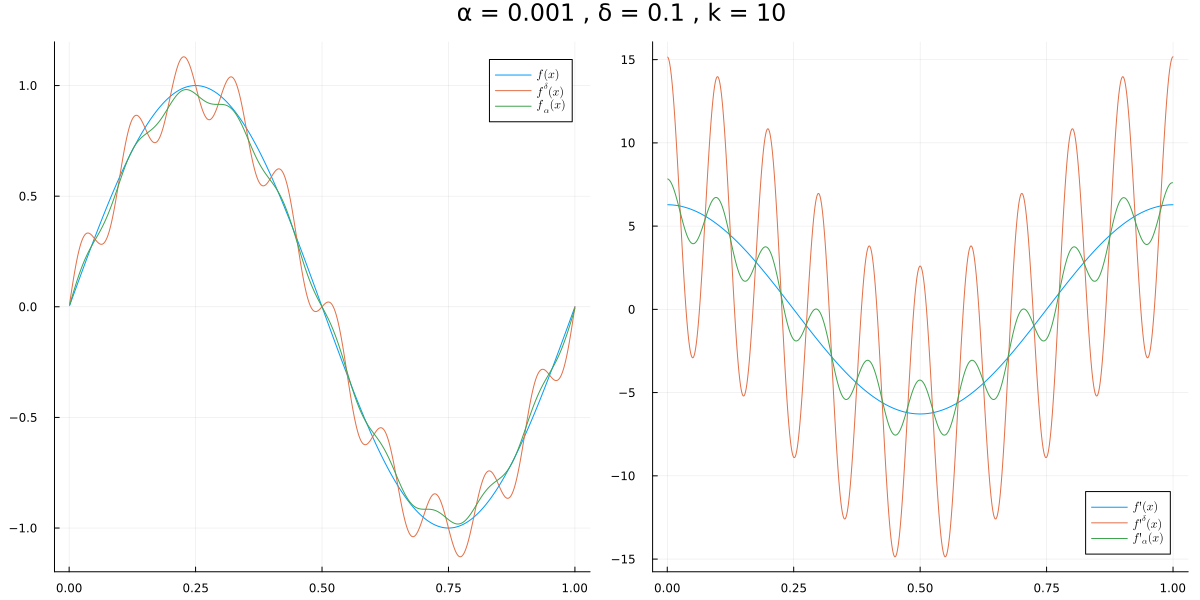

In [7]:
p1 = plot(x, f.(x) , label = L"f(x)" )
plot!(x,fδ.(x,δ) , label = L"f^{δ}(x)")
plot!(x,y , label = L"f_{α}(x)" )

p2 = plot(x, dfdx.(x) , label = L"f'(x)" )
plot!(x,dfδdx.(x,δ) , label = L"f'^{δ}(x)")
plot!(x[1:end-1],dydx , label = L"f'_{α}(x)")

plot(p1,p2 , suptitle = "α = $(α) , δ = $(δ) , k = $(k)" , size = (1200,600))

# Problem 06 - 07

We know that 

$$ \Vert f'_{\alpha} - f' \Vert^2_{L^2(0,1)} \leq \frac{\delta^2}{2\alpha} + \frac{\alpha}{2} C ,\quad C = \Vert f'' \Vert_{L^2(0,1)}^2 $$

The optimal $\alpha_{opt}$ is given by

$$ \alpha_{opt} = \frac{\delta}{ \sqrt{C}} ,\quad C = \int_0^1 (-4\pi^2 \sin(2\pi x))^2 = 8 \pi^2$$


In [8]:
function Area( h , y )
    return sum( [ .5 * h * (y[q+1] + y[q]) for q = 1:(length(y)-1) ] )
end

function L2( α , δ )
    x , y = fα( α , δ)
    h = x[2] - x[1]
    diff = (f.(x) - y) .^ 2
    S = Area( h , diff)
    return sqrt(S)
end

function L2_diff( α , δ )
    x , y = fα( α , δ)
    h = x[2] - x[1]
    dydx = (y[2:end] .- y[1:end-1]) / (x[2] - x[1]) ;
    diff = (dfdx.(x)[2:end] - dydx) .^ 2
    S = Area( h , diff)
    return sqrt(S)
end

L2_diff (generic function with 1 method)

In [ ]:
α = range( 0, .05 ,1000)
l2 = L2.(α,δ)
dfL2 = L2_diff.(α,δ);

1000-element Vector{Float64}:
 6.269627415693806
 5.223438817280888
 4.484193807633523
 3.9285713033587406
 3.4956254797505295
 3.148776537497852
 2.864694234605013
 2.627790600449099
 2.4272531943175637
 2.2553464052574
 ⋮
 2.9364109141315957
 2.9374095304318804
 2.9384068163341173
 2.9394027744927254
 2.9403974075558224
 2.9413907181641035
 2.942382708951615
 2.943373382545111
 2.944362741564351

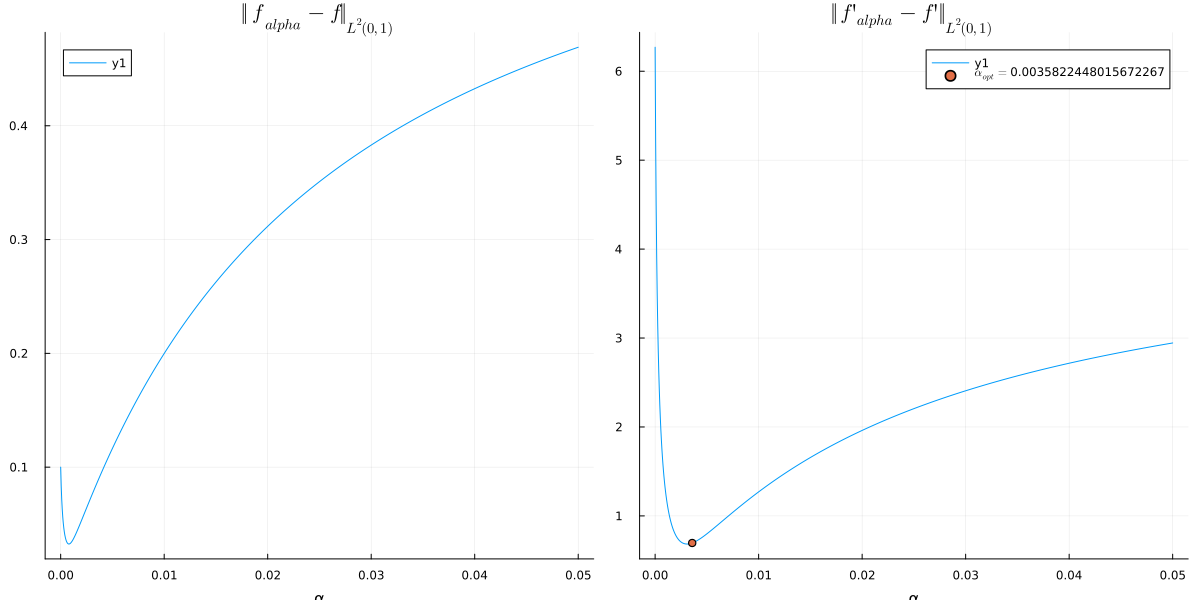

In [65]:
C = 8*π^4 
α_opt = δ / C^.5

p1 = plot( α , l2 , title = L"\Vert f_{alpha} - f \Vert_{L^2(0,1)}")
p2 = plot( α , dfL2  , title  = L"\Vert f'_{alpha} - f' \Vert_{L^2(0,1)}")
scatter!( [α_opt] ,  [L2_diff(α_opt,δ)] , label = L"α_{opt}=" * "$(α_opt)")
plot( p1 , p2 , size = (1200,600) , xlabel ="α")